In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.drop(df.columns[[2,3,4]], axis = 1, inplace = True) 

In [30]:
df['length'] = df['v2'].apply(len)
df.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
len(df)

5572

In [32]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

Balance the Data

In [33]:
ham = df[df['v1'] == 'ham']
ham.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77


In [34]:
spam = df[df['v1'] == 'spam']
spam.head()

,v1,v2,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [35]:
ham.shape ,spam.shape

((4825, 3), (747, 3))

In [36]:
ham = ham.sample(spam.shape[0])
ham.shape

(747, 3)

In [37]:
data = ham.append(spam,ignore_index=True)
data.head()

,v1,v2,length
0,ham,Whatsup there. Dont u want to sleep,35
1,ham,What's a feathery bowa? Is that something guys...,76
2,ham,You know my old Dom I told you about yesterday...,141
3,ham,Mmmm.... I cant wait to lick it!,32
4,ham,Oh Howda gud gud.. Mathe en samachara chikku:-),47


In [38]:
data.head()

,v1,v2,length
0,ham,Whatsup there. Dont u want to sleep,35
1,ham,What's a feathery bowa? Is that something guys...,76
2,ham,You know my old Dom I told you about yesterday...,141
3,ham,Mmmm.... I cant wait to lick it!,32
4,ham,Oh Howda gud gud.. Mathe en samachara chikku:-),47


### Exploratory Data Analysis

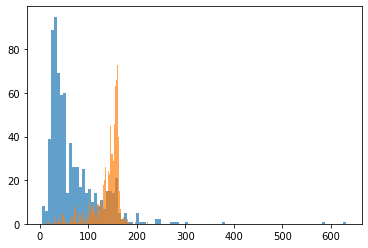

In [41]:
plt.figure()
plt.hist(data[data['v1'] == 'ham']['length'] , bins = 100 ,alpha = 0.7)
plt.hist(data[data['v1'] == 'spam']['length'] , bins = 100 ,alpha = 0.7)
plt.show()

### Data Prepration

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
X_train,X_test,y_train,y_test = train_test_split(data['v2'] , data['v1'],test_size = 0.3 ,random_state = 0 ,shuffle = True ,stratify = data['v1'])

In [53]:
### Bag of word (unique) Creation

In [49]:
vectorizer = TfidfVectorizer()

In [50]:
X_train = vectorizer.fit_transform(X_train)

<1045x3676 sparse matrix of type '<class 'numpy.float64'>'
	with 17711 stored elements in Compressed Sparse Row format>

### Pipeline and RF

In [54]:
clf = Pipeline([('tfidf' , TfidfVectorizer()) , ('clf',RandomForestClassifier(n_estimators=100 , n_jobs=-1))])

In [57]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [58]:
y_pred = clf.predict(X_test)

In [59]:
confusion_matrix(y_test,y_pred)

array([[225,   0],
       [ 26, 198]], dtype=int64)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       225
        spam       1.00      0.88      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [122]:
RF_acc_score = accuracy_score(y_test,y_pred)
RF_acc_score

0.9599109131403119

In [115]:
clf.predict(["Hey,you won free tickets this summer.Text 'WON' @ 75489.....Hurry few Hours Left."])

array(['spam'], dtype=object)

# Pipeline and  SVC

In [116]:
clf = Pipeline([('tfidf' , TfidfVectorizer()) , ('clf',SVC(C=1000,gamma='auto',))])

In [117]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fun

In [118]:
y_pred = clf.predict(X_test)

In [119]:
confusion_matrix(y_test,y_pred)

array([[224,   1],
       [ 17, 207]], dtype=int64)

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       225
        spam       1.00      0.92      0.96       224

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [123]:
SCV_acc_score = accuracy_score(y_test,y_pred)
SCV_acc_score

0.9599109131403119

In [110]:
clf.predict(["wassup??"])

array(['ham'], dtype=object)

In [111]:
clf.predict(["Are you free Tonight?? call me @327001 now and throw away your boredom."])

array(['spam'], dtype=object)